# Take-Home Challenge: Ultimate Technologies Inc.

<font size="3">Ultimate Technologies Inc. is an American worldwide online transportation network company that has disrupted the taxi and logistics industry and is a prestigious companies to work at. This challenge has been adapted from an actual Ultimate Inc. data science challenge.</font>

## Importing modules

In [57]:
import json
import datetime as dt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

## Reading dataset: logins.json

In [2]:
# load json as Dict
logins_dict = json.load(open('logins.json'))
print("Keys: ", logins_dict.keys())
print("First 3 entries:", logins_dict['login_time'][:3])
n_data = len(logins_dict['login_time'])
print("Number of logins: ", n_data)

Keys:  dict_keys(['login_time'])
First 3 entries: ['1970-01-01 20:13:18', '1970-01-01 20:16:10', '1970-01-01 20:16:37']
Number of logins:  93142


In [279]:
# load json as DataFrame
logins_df = pd.read_json('logins.json')
print(logins_df.head())
print('\n')
print(logins_df.info())
print('\n', logins_df.describe())

           login_time
0 1970-01-01 20:13:18
1 1970-01-01 20:16:10
2 1970-01-01 20:16:37
3 1970-01-01 20:16:36
4 1970-01-01 20:26:21


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
login_time    93142 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB
None

                  login_time
count                 93142
unique                92265
top     1970-02-12 11:16:53
freq                      3
first   1970-01-01 20:12:16
last    1970-04-13 18:57:38


## Part 1 ‑ Exploratory data analysis: logins

<font size="3">The logins.json file contains (simulated) timestamps of user logins in a particular geographic location. Aggregate these login counts based on 15-minute time intervals, and visualize and describe the resulting time series of login counts in ways that best characterize the underlying patterns of the demand. Please report/illustrate important features of the demand, such as daily cycles. If there are data quality issues, please report them.</font>

### 15-min aggregate of the login counts

In [23]:
# Aggregate the login counts based on 15-minute time intervals
counts_15min = logins_df.resample('15T', on='login_time').count()
counts_15min.columns = ['counts']
counts_15min.head()

,counts
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


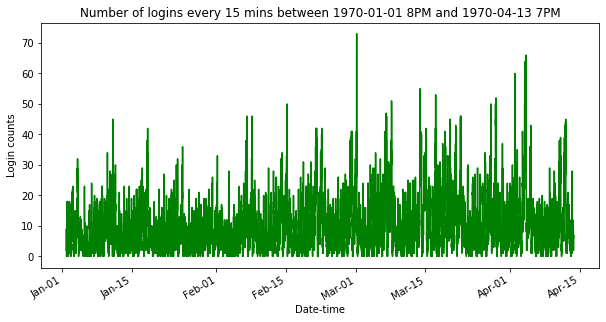

In [131]:
# Visualize the login counts
fig = plt.figure(figsize=(10,5))
plt.plot(counts_15min.index,counts_15min.counts, color='green')
myFmt = mdates.DateFormatter('%b-%d')
plt.gca().xaxis.set_major_formatter(myFmt)
plt.gcf().autofmt_xdate()
plt.title("Number of logins every 15 mins between 1970-01-01 8PM and 1970-04-13 7PM")
plt.xlabel('Date-time')
plt.ylabel('Login counts')
plt.show()

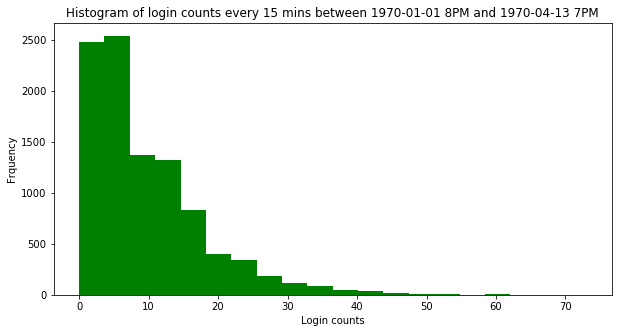

            counts
count  9788.000000
mean      9.515938
std       8.328818
min       0.000000
25%       3.000000
50%       7.000000
75%      13.000000
max      73.000000


In [209]:
# Visualize the histogram
counts_15min.hist(bins=20, grid=False, color='green', figsize=(10,5))
plt.title("Histogram of login counts every 15 mins between 1970-01-01 8PM and 1970-04-13 7PM")
plt.xlabel('Login counts')
plt.ylabel('Frquency')
plt.show()
print(counts_15min.describe())

### Login Counts Statistics
<font size="3"> 
In a 15-min window, the average login counts is 9.5 and the counts are in the range of minmum 0 to maximum 73 logins. It's worth noting that the distribution of the counts over seems to be non-stationary with the rate of logins increasing over time. We will examine the overal trend in the following section.
</font> 

### Day and time cyclicality
<font size="3"> 

While the chart above shows the cyclicality of days in a week and hours in a day; however, we can gain better insights when we examine the overal trend of login-counts between Jan 01 - April 13 and the cycliclity of days and hours in seperate charts. Let's first check the weekly login counts trend:

</font> 

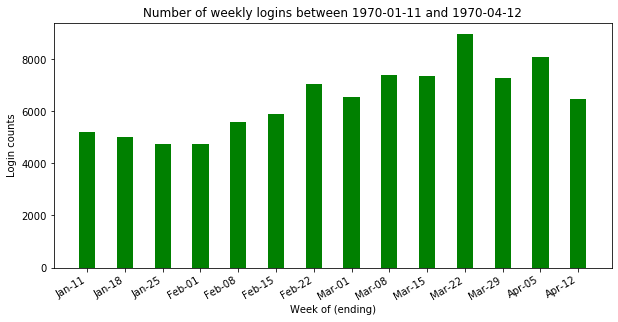

            counts
count    14.000000
mean   6455.214286
std    1304.743664
min    4744.000000
25%    5305.750000
50%    6522.500000
75%    7324.750000
max    8955.000000


In [211]:
# Aggregate the login counts based on weekly periods
counts_weekly = logins_df.resample('W', on='login_time').count()
counts_weekly.columns = ['counts']

# Visualize the login counts
fig = plt.figure(figsize=(10,5))
plt.bar(counts_weekly[1:-1].index,counts_weekly[1:-1].counts, width=3.0, color='green')
plt.gca().xaxis.set_major_formatter(myFmt)
plt.gcf().autofmt_xdate()
plt.xticks(counts_weekly[1:-1].index[::1])
plt.title("Number of weekly logins between 1970-01-11 and 1970-04-12")
plt.xlabel('Week of (ending)')
plt.ylabel('Login counts')
plt.show()
print(counts_weekly[1:-1].describe())

<font size="3">

Therefore, the number of weekly logins was increasing from approx. 5000 to 9000 in the week of March 22 (ending) when the login counts started decreasing to approx. 6000.

<br> Next, we focus on micro cyclicality of the days in a week:
    
</font>

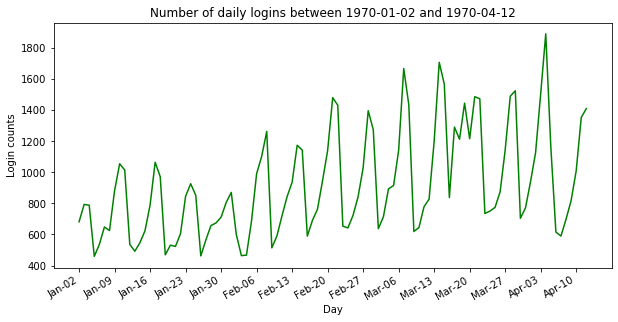

            counts
count   101.000000
mean    917.178218
std     337.486278
min     459.000000
25%     648.000000
50%     837.000000
75%    1142.000000
max    1889.000000


In [227]:
# Aggregate the login counts based on daily periods
counts_daily = logins_df.resample('D', on='login_time').count()
counts_daily.columns = ['counts']

# Visualize the login counts
fig = plt.figure(figsize=(10,5))
plt.plot(counts_daily[1:-1].index,counts_daily[1:-1].counts, color='green')
plt.gca().xaxis.set_major_formatter(myFmt)
plt.gcf().autofmt_xdate()
plt.xticks(counts_daily[1:-1].index[::7])
plt.title("Number of daily logins between 1970-01-02 and 1970-04-12")
plt.xlabel('Day')
plt.ylabel('Login counts')
plt.show()
print(counts_daily[1:-1].describe())

<font size="3">

The daily up and down variations further reveals that some days in a week have higher number logins whereas in some other days the users' activity is pretty low. Box plots of the distributions of login counts by each day of the week further signifies the difference of each day: During Fri - Sun, the company had experienced higher login rates.

**There seem to be abnormally high number of login counts on Tue (Mar 17), Wed (Mar 18), and Thu (Mar 19).** Further investigations show that the week of March 16 - March 22 follows a different pattern than the other weeks. The chart above also illustrates the abnormality where the curve is seemingly clipped.

</font>

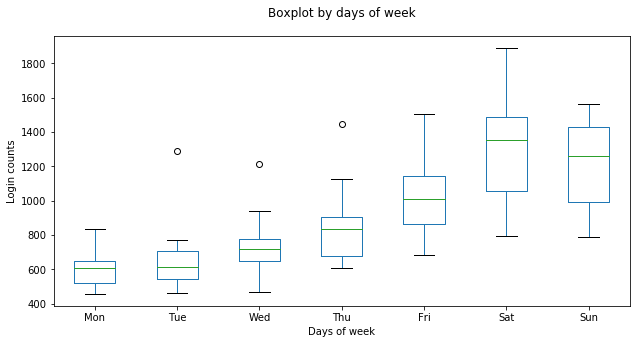

In [225]:
counts_weekday = counts_daily.copy()
counts_weekday.index = counts_daily.index.weekday

# Visualize a boxplot to reveal the cyclicality
counts_weekday[1:-1].boxplot(by='login_time', grid=False, figsize=(10,5))
plt.xticks(np.arange(1, 8), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.title("")
plt.suptitle("Boxplot by days of week")
plt.xlabel('Days of week')
plt.ylabel('Login counts')
plt.show()

<font size="3">

Finally, we examine repeating patterns during different hours in a day. As the bar chart and the box plot below prove, noon and evenings through mid-nights constitute high traffic hourse for Ultimate Inc.

<br> **Early hours of April 04 (particularly 1 AM and 5 AM) seem to be unusually busy.**
    
</font>

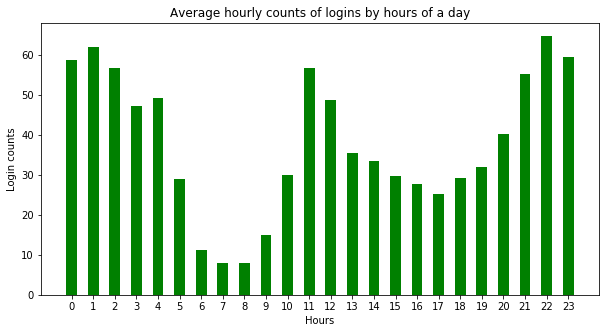

            counts
count  2447.000000
mean     38.063752
std      30.752820
min       0.000000
25%      15.000000
50%      29.000000
75%      52.000000
max     237.000000


In [269]:
counts_hourly = logins_df.resample('H', on='login_time').count()
counts_hourly.columns = ['counts']
counts_hourly.index = counts_hourly.index.hour

mean_counts_hourly = counts_hourly.groupby('login_time').mean()

# Visualize the login counts
fig = plt.figure(figsize=(10,5))
plt.bar(mean_counts_hourly.index, mean_counts_hourly.counts, width=.5, color='green')
plt.xticks(mean_counts_hourly.index[::1])
plt.title("Average hourly counts of logins by hours of a day")
plt.xlabel('Hours')
plt.ylabel('Login counts')
plt.show()
print(counts_hourly.describe())

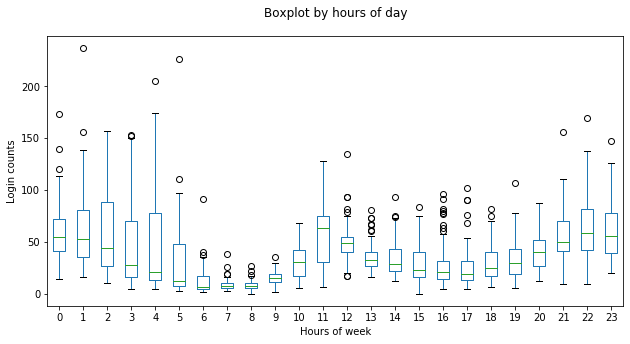

In [173]:
# Visualize a boxplot to reveal the cyclicality
counts_hourly.boxplot(by='login_time', grid=False, figsize=(10,5))
#plt.xticks(np.arange(1, 8), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.title("")
plt.suptitle("Boxplot by hours of day")
plt.xlabel('Hours of week')
plt.ylabel('Login counts')
plt.show()

## Part 2 ‑ Experiment and metrics design

<font size="3"> 
The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active during the day. On weekends, there is reasonable activity in both cities. However, a toll bridge, with a two way toll, between the two cities causes driver partners to tend to be exclusive to each city. The Ultimate managers of city operations for the two cities have proposed an experiment to encourage driver partners to be available in both cities, by reimbursing all toll costs.

1. What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?

<br>

2. Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:

   a) how you will implement the experiment
  
   b) what statistical test(s) you will conduct to verify the significance of the observation
  
   c) how you would interpret the results and provide recommendations to the city operations team along with any caveats.

</font>

<font size="3">

**Answers:**
<br>

1. Number of the Gotham drivers' rides crossing the bridge from Gotham to Metropolis. If the plan succeeds, one would expect an increase for this metric in comparison to  the similar metric in the absence of the reimbursement. Conversely, the number of the Metropolis drivers' rides crossing the bridge from Metropolis to Gotham should also be evaluated to make sure that the surge in the number of available drivers is the result of the execution of this plan. 

   The chart below shows the expected outcome of the plan during the weekdays, assuming the objective of the managers was to balance supply and demand. Obviously, the matching is more challenging during the peak hours of each city. So, in-flow of drivers from the city at its off-peak hours towards the city at its peak hours can be the most useful expected outcome.

    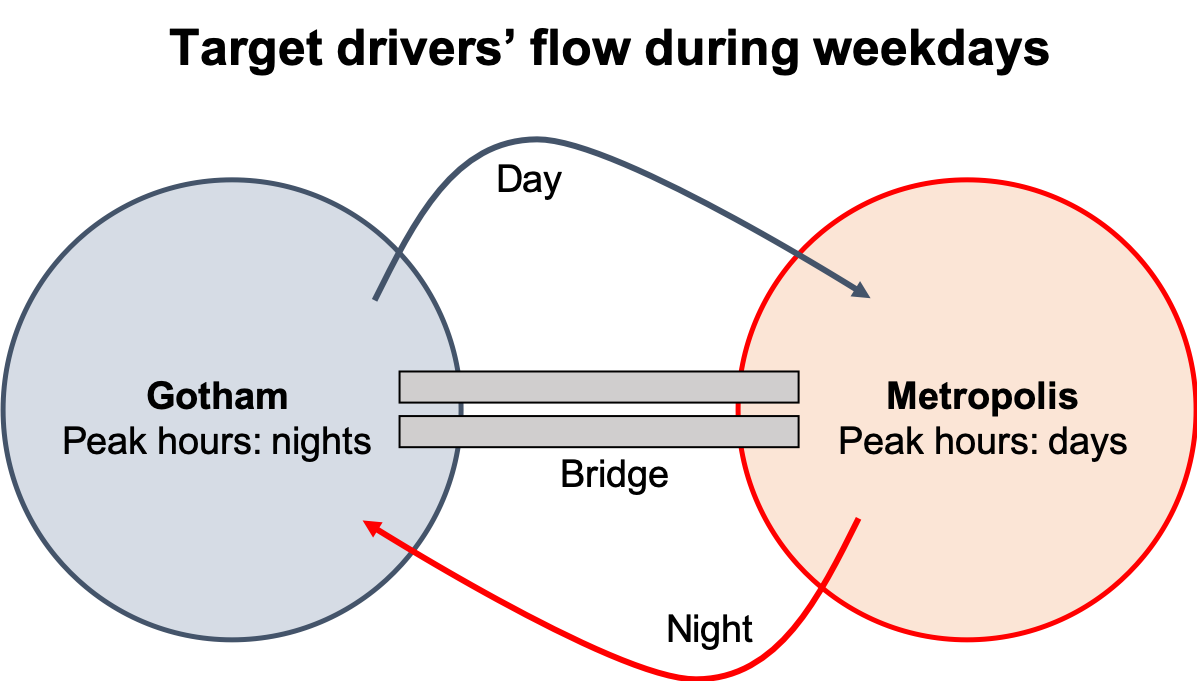 
    <br>

2. Description of the experiment:
   
   a) We randomly select 100 drivers in each city (two groups for two cities). Next, we apply the reimbursement plan to half of the drivers (i.e., 50 >> 30) in each group and no change to the rest of the drivers. We then measure the daily crossings of the drivers for a period of at least 2 weeks and use the following statistical testing. We assume one business cycle should include an entire week taking into account the different traffic patterns for different days of a week. So, the experiment is set for 2 business cycles, making sure that the drivers would have enough time to adjust to the new plan.
   
   test sample size (2.5% significance level)  = $1.96^{2}*0.1*0.9/0.05^2 = 138.3$ --> approx. $150$ drivers for 2 weeks
   
   b) I would set 2 pairs of binary hypothesis as follows:
      
      **Define:**
      
      $N_{G}$ : Number of Gotham drivers' crossings
      
      $N_{M}$ : Number of Metropolis drivers' crossings
      
      Experiment A: No reimbursement plan
      
      Experiment B: With reimbursement plan
      
      **Hypothesis:**
      
      $H0: E[N_{G|B} - N_{G|A}] = 0$
      
      $H1: E[N_{G|B} - N_{G|A}] > 0$
     
      AND
      
      $H0: E[N_{M|B} - N_{M|A}] = 0$
      
      $H1: E[N_{M|B} - N_{M|A}] > 0$
      
      Note: We are better off doing the tests above on the following slices of the dataset for each city as the expected metric is likely to be impacted by the plan differently:
      - The whole 14-day data
      - Weekends only: 4 days
      - Weekdays only: 10 days
      - Weekdays' off-peak hours
      - Weekdays' peak hours
      
   **Statistical Test:**
      
   I would use a 2-sample 1-sided Z-test as the sample size is large enough (> 30 drivers) and can assume the difference of the numbers are approximately normally distributed. I would choose a 2.5% as the significance level for each hypothesis (It's basically $\alpha$ of 5% divided by the number of tests). 
   
   c) The new plan would win when the p-value for both test turns out lower than 2.5%. While we can let the test run for 14 days, when can check the statistical significance on the cumulative dataset at the end of each day for any unfavorable extreme impact. One important caveat of this test is independence assumption of the drivers' decision to cross the bridge as they might be linked via a common cause or networking effects. Last but not least, it's important to monitor the significance of the change of other business-as-usual metrics during the experiments to make sure that would not be negatively affected.

</font>

## Part 3 ‑ Predictive modeling
<br>
<font size='3'>

Ultimate is interested in predicting rider retention. To help explore this question, we have provided a sample dataset of a cohort of users who signed up for an Ultimate account in January 2014. The data was pulled several months later; we consider a user retained if they were “active” (i.e. took a trip) in the preceding 30 days. 
    
We would like you to use this data set to help understand what factors are the best predictors for retention, and offer suggestions to operationalize those insights to help Ultimate. 

The data is in the attached file ultimate_data_challenge.json. See below for a detailed description of the dataset. Please include any code you wrote for the analysis and delete the dataset when you have finished with the challenge.

   1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided data for this analysis (a few sentences/plots describing your approach will suffice). What fraction of the observed users were retained?
   2. Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model? Include any key indicators of model performance.
   3. Briefly discuss how Ultimate might leverage the insights gained from the model to improve its longterm rider retention (again, a few sentences will suffice).

**Data description**
- city: city this user signed up in
- phone: primary device for this user
- signup_date: date of account registration; in the form ‘YYYY MM DD’
- last_trip_date: the last time this user completed a trip; in the form ‘YYYY MM DD’
- avg_dist: the average distance in miles per trip taken in the first 30 days after signup
- avg_rating_by_driver: the rider’s average rating over all of their trips
- avg_rating_of_driver: the rider’s average rating of their drivers over all of their trips
- surge_pct: the percent of trips taken with surge multiplier > 1
- avg_surge: The average surge multiplier over all of this user’s trips
- trips_in_first_30_days: the number of trips this user took in the first 30 days after signing up
- ultimate_black_user: TRUE if the user took an Ultimate Black in their first 30 days; FALSE otherwise
- weekday_pct: the percent of the user’s trips occurring during a weekday

</font>

### Reading dataset into a dataframe
<font size="3">
<br>
    
As it can be seen below, there are 50,000 records and 12 features. There are some missing values for **avg_rating_of_driver**, **phone**, and **avg_rating_by_driver**.

</font>

In [587]:
# load json as DataFrame
users_df = pd.DataFrame(json.load(open('ultimate_data_challenge.json')))
users_df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [588]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
city                      50000 non-null object
trips_in_first_30_days    50000 non-null int64
signup_date               50000 non-null object
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
last_trip_date            50000 non-null object
phone                     49604 non-null object
surge_pct                 50000 non-null float64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


### Data cleaning, exploratory analysis, and visualizations

<font size="3">   
Datetime conversions ...
</font>

In [589]:
from datetime import timedelta

# Convert to datetime format
users_df['last_trip_date'] = pd.to_datetime(users_df['last_trip_date'], format="%Y-%m-%d") 
users_df['signup_date'] = pd.to_datetime(users_df['signup_date'], format="%Y-%m-%d") 

<font size="3">   
Some data health checks ...


Check whether signup dates are in the expected range (Jan 2014):
</font>

In [590]:
print("First signup date:", min(users_df['signup_date']).date())
print("Last signup date:", max(users_df['signup_date']).date())

First signup date: 2014-01-01
Last signup date: 2014-01-31


<font size="3">   
Assert signup dates are NOT after the corresponding last trip date:
</font>

In [591]:
assert not all(users_df['signup_date'] > users_df['last_trip_date'])

<font size="3">   
Check for any abnormal numerical values
</font>

In [592]:
users_df.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
count,50000.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000,49799.000000
mean,2.278200,4.601559,1.074764,8.849536,60.926084,5.796827,4.778158
std,3.792684,0.617338,0.222336,19.958811,37.081503,5.707357,0.446652
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,4.300000,1.000000,0.000000,33.300000,2.420000,4.700000
50%,1.000000,4.900000,1.000000,0.000000,66.700000,3.880000,5.000000
75%,3.000000,5.000000,1.050000,8.600000,100.000000,6.940000,5.000000
max,125.000000,5.000000,8.000000,100.000000,100.000000,160.960000,5.000000


<font size="3">
    
**Suspicious zeros**

150 records with avg_dist of zero are suspicious. We will leave them in the dataset as we don't have a reason to remove them; however, they need further investigation.

</font>

In [1095]:
print("Number of records with avg_dist of zero:", (users_df.avg_dist == 0).sum())

Number of records with avg_dist of zero: 150


<font size="3">   

Convert city and phone data type to categorical and add a new category for phone's missing values as "NA".
</font>

In [593]:
# make city and phone categorical features
users_df['phone'].fillna("NA", inplace=True)
users_df = users_df.astype({'city':'category', 'phone':'category'})
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
city                      50000 non-null category
trips_in_first_30_days    50000 non-null int64
signup_date               50000 non-null datetime64[ns]
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
last_trip_date            50000 non-null datetime64[ns]
phone                     50000 non-null category
surge_pct                 50000 non-null float64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
dtypes: bool(1), category(2), datetime64[ns](2), float64(6), int64(1)
memory usage: 3.6 MB


<font size="3">   
**Missing values**
    
If we were to remove the rows with at least one missing values, how many records would we have lost?
</font>

In [594]:
# Calculate the number of records with at least one feature with missing value
missing_values_df = users_df[users_df.isnull().any(axis=1)]
print("Number of records with at least on null feature value:", len(missing_values_df))

Number of records with at least on null feature value: 8256


<font size="3">   
It's quite high: 17% of the dataset will be lost. Over 8000 of values for just avg_rating_of_driver are missing. Phone and avg_rating_by_driver have much fewer missing values. 

In [595]:
users_df['avg_rating_by_driver'].fillna(users_df['avg_rating_by_driver'].mean(), inplace=True)
users_df['avg_rating_of_driver'].fillna(users_df['avg_rating_of_driver'].mean(), inplace=True)

In [596]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
city                      50000 non-null category
trips_in_first_30_days    50000 non-null int64
signup_date               50000 non-null datetime64[ns]
avg_rating_of_driver      50000 non-null float64
avg_surge                 50000 non-null float64
last_trip_date            50000 non-null datetime64[ns]
phone                     50000 non-null category
surge_pct                 50000 non-null float64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
avg_dist                  50000 non-null float64
avg_rating_by_driver      50000 non-null float64
dtypes: bool(1), category(2), datetime64[ns](2), float64(6), int64(1)
memory usage: 3.6 MB


In [597]:
# Get the 30th days from the latest trip date in the dataset
retention_cutoff_date = max(users_df['last_trip_date']) - timedelta(days=30) 
print("Cut-off date for the active users: ", retention_cutoff_date.date())

# Add a column to identify active users
users_df['is_active'] = (users_df['last_trip_date'] >= retention_cutoff_date).astype(int)

# Calculate the fraction of observed users retained
print("Fraction of observed users retained: ", sum(users_df['is_active']) / len(users_df))

Cut-off date for the active users:  2014-06-01
Fraction of observed users retained:  0.37608


<font size="3">   
**EDA and Visualizations:**
</font>

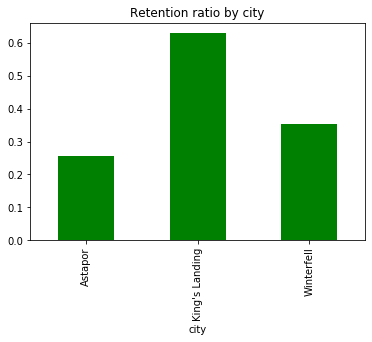

In [598]:
(users_df.groupby('city').is_active.sum()/users_df.groupby('city').city.count()).plot.bar(color='green');
plt.title("Retention ratio by city");

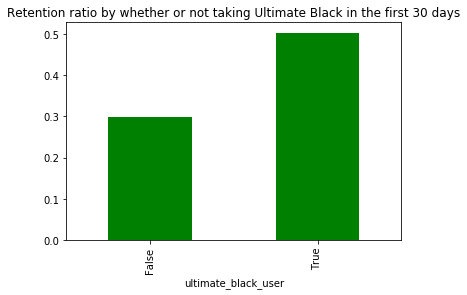

In [599]:
(users_df.groupby('ultimate_black_user').is_active.sum()/
 users_df.groupby('ultimate_black_user').ultimate_black_user.count()).plot.bar(color='green');
plt.title("Retention ratio by whether or not taking Ultimate Black in the first 30 days");

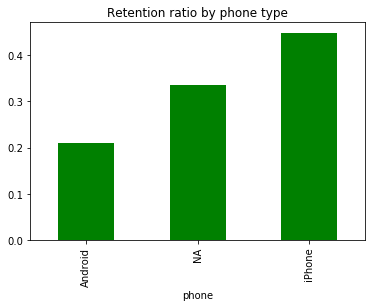

In [600]:
(users_df.groupby('phone').is_active.sum()/users_df.groupby('phone').phone.count()).plot.bar(color='green');
plt.title("Retention ratio by phone type");

<font size="3">
The following three groups of users of Jan 2014 cohort, exhibited higher retention rates among their peers:
    
   - Those in King's Landing;
   - The customers who had taken Ultimate Black rides in their first 30 days; and
   - Those with iPhones 

</font>

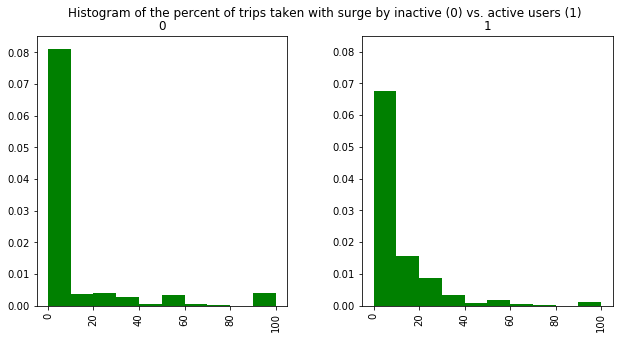

In [601]:
users_df['surge_pct'].hist(by=users_df['is_active'], 
                           bins=10, density=True, 
                           figsize=(10,5), color='green');
plt.suptitle("Histogram of the percent of trips taken with surge by inactive (0) vs. active users (1)");
plt.ylim([0,0.085]);

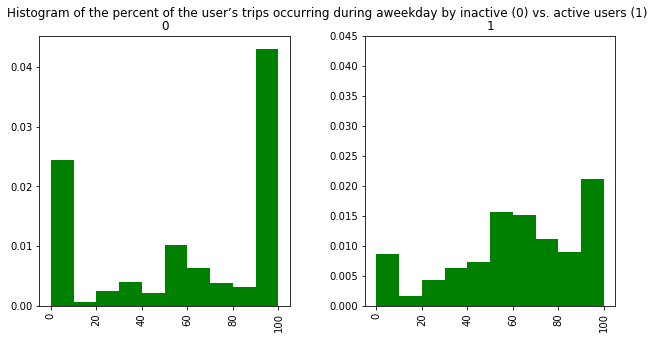

In [602]:
users_df['weekday_pct'].hist(by=users_df['is_active'], 
                                      bins=10, density=True, 
                                      figsize=(10,5), color='green');
plt.suptitle("Histogram of the percent of the user’s trips occurring during a" \
             "weekday by inactive (0) vs. active users (1)");
plt.ylim([0,0.045]);

<font size="3">

There seem to be a positive correlation between the customers who experienced higher percentage of surged-price rides and their retention chance. The situation with regards to the percent of the rides occurring during weekdays is more polarized. In other words, it seems weekend-only and weekday-only users have higher churn probabilities.

</font>

### Predictive Modelling: 
### Preprocessing

In [603]:
# Define a label for the active users
users_df['m6_is_active'] = (users_df['last_trip_date'] >= 
                             (users_df['signup_date'] + timedelta(days=151))).astype('int')

In [604]:
print("Number of active users: ", users_df['m6_is_active'].sum())
print("Percent active users: ", users_df['m6_is_active'].sum()/len(users_df))

Number of active users:  12198
Percent active users:  0.24396


<font size="3">
    
**Feature selection and transformation**

First check the predictive power of each numerical feature by comparing the mutual correlation coefficients. 
It turns out that trips_in_first_30_days, ultimate_black_user, avg_dist are the three highest predictive features.
</font>

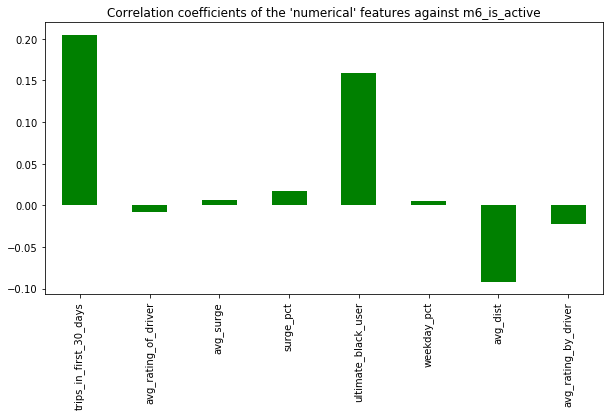

In [624]:
# Find and show correlation coefficients of the numerical features against m6_is_active
users_df.corr().m6_is_active[:-2].plot.bar(color='green', figsize=(10,5))
plt.title("Correlation coefficients of the 'numerical' features against m6_is_active");

<font size="3">
    
Possible confouding for highly correleated features: avg_surge and surge_pct. Let's drop avg_surge.

</font>

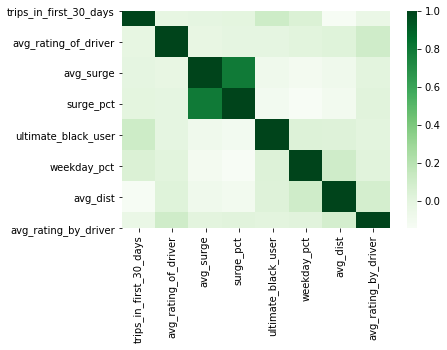

In [633]:
sns.heatmap(users_df.corr().iloc[:-2,:-2], cmap="Greens");

<font size="3">
    
We drop 'last_trip_date' and 'signup_date' as well. Because they were used to define 'm6_is_active'. Let's drop column 'is_active' as it's redundant. 

Dataframe 'modelling_df' is the dataset that will be used for the predictive modelling.
</font>

In [646]:
modelling_df = users_df.drop(['surge_pct', 'last_trip_date', 'signup_date',  'is_active'], inplace=False, axis=1)

<font size="3">
    
**Transformation**

We use SQRT transformation for 'trips_in_first_30_days' and 'avg_dist', as the large values for these features does not necessarily scale linearly with logit of the retention conceptually.
</font>

In [749]:
modelling_df[['trips_in_first_30_days' , 'avg_dist']] = \
users_df[['trips_in_first_30_days', 'avg_dist']]**0.5
#apply(lambda x: np.log(x+1))

<font size="3">
    
**One-hot encoding (for Logistic Regression)**

We need to convert the two categorical and the one boolean featuers (optional) to numerical values. Therefore, we use one-hot encoding as the variables are not oridinal.
</font>

In [750]:
modelling_1hot_df = pd.get_dummies(modelling_df, 
                                       columns=['city','phone', 'ultimate_black_user'], 
                                       prefix = ['city','phone', 'ultimate_black_user'])

modelling_1hot_df.head()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,weekday_pct,avg_dist,avg_rating_by_driver,m6_is_active,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_NA,phone_iPhone,ultimate_black_user_False,ultimate_black_user_True
0,2.000000,4.7,1.10,46.2,1.915724,5.0,0,0,1,0,0,0,1,0,1
1,0.000000,5.0,1.00,50.0,2.874022,5.0,0,1,0,0,1,0,0,1,0
2,1.732051,4.3,1.00,100.0,0.877496,5.0,0,1,0,0,0,0,1,1,0
3,3.000000,4.6,1.14,80.0,1.536229,4.9,1,0,1,0,0,0,1,0,1
4,3.741657,4.4,1.19,82.4,1.769181,4.9,0,0,0,1,1,0,0,1,0


<font size="3">
    
**Train-Test split**

We set asid 30% of the data for test and would stratify the test data as the dataset is imbalanaced with a tiny portion (24%) of positives.

</font>

In [948]:
from sklearn.model_selection import train_test_split

x = modelling_1hot_df.drop(['m6_is_active'], inplace=False, axis=1)
y = modelling_1hot_df[['m6_is_active']].values[:,0]

X_train, X_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size=0.3, 
                                                    random_state=50,
                                                   stratify=y)

### Modelling and performance metric
<br>
<font size='3'>

This is a supervised learning problem and we will try two classifers: Logistic Regression, Complement Naive Bayes, and Random Forest. 

One important is the metric to choose the best model based upon. I would assume Ultimate is interested in prediting the inactive users so they can take the necessary measures to reduce the churn. Therefore, Ultimate needs to accurately predicts the inactive users (i.e., high ture negatives and low false positives) while providing a fair quality prediction for true positives (i.e. avoding a scenraio where it always predicts inactive users). In metrics terms, we need a very high recall and a high precision ratios for inactive (label=0) users. So, an $F_{\beta}$ score with $\beta > 1$ can be a good measure. We choose $\beta = 1.5$.

See the target confusion metrix below:

|            | Pred 0  | Pred 1  |
|-:          |:-:      |:-:      |
|**Actual 0**|Very High| Very Low|
|**Actual 1**|Low      | High    |


However, this is just one scenario out of many. For example, Ultimate maight be interetsed in the active users more to increase their revenue per active users or forcasting demand in a city to adjust their supply (i.e., drivers). 



</font>

In [949]:
# Define the F_beta metric for inactive users
from sklearn.metrics import confusion_matrix, fbeta_score, make_scorer

beta = 1.5
pos_label = 0
fbeta_scorer = make_scorer(fbeta_score, beta=beta, pos_label=pos_label)

### Logistic Regression
<font size='3'>
<br>
We use a 5-fold cross validation with hyper-parameter tuning to find the best Logistic Regression model with highest F_beta metric. 

**Imbalanced dataset:** In this exercise we are dealing with an imbalanced dataset which adds a bias to model in favor of inactive users (which have larger population). Therefore, use class_weight parameter to add weight to the loss function and increase the misclassification penalty for active users.

</font>

In [950]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

grid = {"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}

logreg = LogisticRegression(solver='liblinear', class_weight='balanced', max_iter=1000)
logreg_cv = GridSearchCV(logreg, grid, cv=5, scoring=fbeta_scorer)
logreg_cv.fit(X_train,y_train)

print("Tuned hpyerparameters:", logreg_cv.best_params_)
print("F_beta score :",logreg_cv.best_score_)

Tuned hpyerparameters: {'C': 0.01, 'penalty': 'l1'}
F_beta score : 0.7154838463950128


In [939]:
y_pred = logreg_cv.best_estimator_.predict(X_test)

print('Confusion matrix of the best estimator:')
print(confusion_matrix(y_test, y_pred))
print("\nF_beta score (test dataset):",fbeta_score(y_test, y_pred, beta, pos_label=pos_label))

Confusion matrix of the best estimator:
[[7604 3737]
 [1209 2450]]

F_beta score (test dataset): 0.7198607641948427


<font size='3'>
<br>
    
**Performance:** The selected Logistic Regression model achieved $F_{\beta = 1.5}$ score of 0.72, and correctly predicted 67% of the inactive users and active users. One can also check the area under the ROC curve for positives as a more general indicator.

</font>

In [940]:
from sklearn.metrics import roc_auc_score
print("\nROC AUC score (test dataset):",roc_auc_score(y_test, y_pred))


ROC AUC score (test dataset): 0.670034732143522


### Naive Bayes
<font size='3'>
<br>

Naive Bayes is the next model we fit. Because the dataset is imbalanced, Complement Navie Bayes is more appropriate. We use a 5-fold cross validation with hyper-parameter tuning to find the best Complement Navie Bayes model with highest F_beta metric.

</font>

In [945]:
from sklearn.naive_bayes import ComplementNB

grid_cNB = {'alpha':np.logspace(-3,3,7)}

cNB = ComplementNB()

cNB_cv = GridSearchCV(cNB, grid_cNB, scoring=fbeta_scorer, cv=5)
cNB_cv.fit(X_train, y_train)

print("Best parameters set found on development set:")
print(cNB_cv.best_params_, '\n')
print("F_beta score :",cNB_cv.best_score_)

Best parameters set found on development set:
{'alpha': 100.0} 

F_beta score : 0.7118775273743264


In [951]:
print('Confusion matrix of the best estimator:')
y2_pred = cNB_cv.best_estimator_.predict(X_test)
print(confusion_matrix(y_test, y2_pred))
print("\nF_beta score (test dataset):",fbeta_score(y_test, y2_pred, beta, pos_label=pos_label))
print("ROC AUC score (test dataset):",roc_auc_score(y_test, y2_pred))

Confusion matrix of the best estimator:
[[7482 3859]
 [1204 2455]]

F_beta score (test dataset): 0.7109412117269558
ROC AUC score (test dataset): 0.6653392645331792


<font size="3">

**Performance:** The selected Complement Navie Bayes  model achieved $F_{\beta = 1.5}$ score of 0.71, and correctly predicted 66% of the inactive users and active users. One can also check the area under the ROC curve for positives as a more general indicator.

Overall, Complement Navie Bayes exhibited a similar performance (slightly underperformed) to that of the Logistic Regression. Computationally, this model is faster and efficient. 

</font>

### Random Forest
<font size='3'>
<br>

Bagging is proven to be strong classification method recently and Random Forest models are based on such technique. We use a 5-fold cross validation with hyper-parameter tuning to find the best Random Forest model with highest F_beta metric. We also use class weights to deal with the imbalanced dataset.

</font>

In [941]:
from sklearn.ensemble import RandomForestClassifier


grid_rf = {'n_estimators':range(60,120,10), 
                    'max_depth':range(13,20), 
                    'min_samples_split':range(50,200,50)}

rf = RandomForestClassifier(random_state=50, class_weight='balanced')

rf_cv = GridSearchCV(rf, grid_rf, scoring=fbeta_scorer, cv=5)
rf_cv.fit(X_train, y_train)

print("Best parameters set found on development set:")
print(rf_cv.best_params_, '\n')
print("F_beta score :",rf_cv.best_score_)

Best parameters set found on development set:
{'max_depth': 18, 'min_samples_split': 50, 'n_estimators': 100} 

F_beta score : 0.8041600806978023


In [952]:
print("Confusion matrix of the best estimator:")
y1_pred = rf_cv.best_estimator_.predict(X_test)
print(confusion_matrix(y_test, y1_pred))
print("\nF_beta score (test dataset):",fbeta_score(y_test, y1_pred, beta, pos_label=pos_label))

Confusion matrix of the best estimator:
[[8752 2589]
 [1051 2608]]

F_beta score (test dataset): 0.8053170631578201


In [943]:
from sklearn.metrics import roc_auc_score
print("\nROC AUC score (test dataset):",roc_auc_score(y_test, y1_pred))


ROC AUC score (test dataset): 0.7422381514066207


<font size="3">

**Performance:** The selected  Random Forest model achieved $F_{\beta = 1.5}$ score of 0.81, and correctly predicted 77% and 71% of the inactive users and active users, respectively. One can also check the area under the ROC curve for positives as a more general indicator which has a higher value than those of Naive Bayes and Logistic Regression.

**Overall, Random Forest outperformed the other alternatives and will be the final model for this problem.**

</font>

### Insights to improve its longterm rider retention
<font size="3">
<br>
We need to first find out what the important features are and how they impact the probability of retention.

</font>

<font size="3">
    
**Relative importance of the features**

The top four features with the highest predictive value are:

- weekday_pct: the percent of the user’s trips occurring during a weekday
- avg_rating_by_driver: the rider’s average rating over all of their trips
- avg_surge: The average surge multiplier over all of this user’s trips
- avg_dist: the average distance in miles per trip taken in the first 30 days after signup


</font>

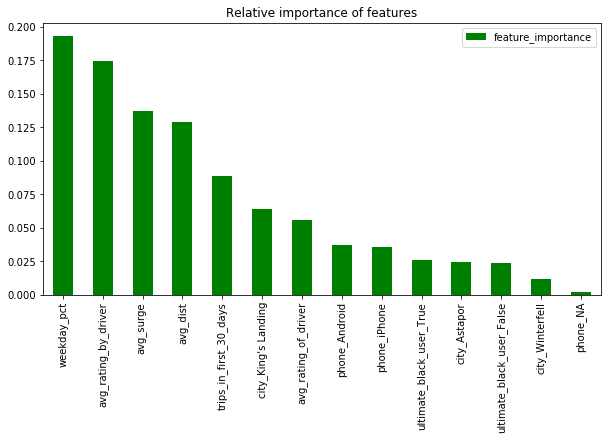

In [923]:
# Plot relative importance of features
importance_df = pd.DataFrame(rf_cv.best_estimator_.feature_importances_, 
                 index=x.columns, columns=['feature_importance']).sort_values(by='feature_importance', 
                                                                              ascending=False)

importance_df.plot.bar(color='green', figsize=(10,5))
plt.title('Relative importance of features');

<font size="3">
    
**Impact of the important features**

We can now define a base scenario for an active user and change the value of the features one at a time (while controlling for other features' values). By this method, we will get an idea how the important features impact the propbability of retention.


</font>

In [1068]:
#Let's define a base example

example = X_test.iloc[6,:].copy()
true_label = y_test[6]
print("An example user of label",true_label,':\n')
print(example)

pred_prob = rf_cv.best_estimator_.predict_proba(np.array(example).reshape(1, -1))
print("Probability of being an active user:", pred_prob[0][1])

An example user of label 1 :

trips_in_first_30_days        1.414214
avg_rating_of_driver          4.000000
avg_surge                     1.190000
weekday_pct                  75.000000
avg_dist                      1.766352
avg_rating_by_driver          4.800000
city_Astapor                  1.000000
city_King's Landing           0.000000
city_Winterfell               0.000000
phone_Android                 0.000000
phone_NA                      0.000000
phone_iPhone                  1.000000
ultimate_black_user_False     0.000000
ultimate_black_user_True      1.000000
Name: 5824, dtype: float64
Probability of being an active user: 0.8359781923697076


In [1073]:
def varImpactPlot(var_name, var_range):
    """
    Evaluates and plots the Random Forest estimator's prediction probabilities 
    of y=1 for different values of the example's feature var_name in range var_range.
    
    inputs
    -----
    var_name: column name of example in str type
    var_range: range of vlaues for example[var_name] in an iterator type
    
    return
    -------
    pred_prob: a list of the Random Forest estimator's prediction probabilities of y=1
    for different values of example[var_name] in var_range
    """

    _example = example.copy()
    pred_prob = []

    for var in var_range:
        _example[var_name] = var
        _pred_prob = rf_cv.best_estimator_.predict_proba(np.array(_example).reshape(1, -1))
        pred_prob.append(_pred_prob[0][1])
    
    # Plot the probablities vs. the feature values
    fig = plt.figure(figsize=(10,2))
    plt.plot(list(var_range), pred_prob, color='green')
    plt.ylabel('Prediction Probability for y=1')
    plt.xlabel(var_name)
    plt.xlim([min(var_range),max(var_range)])
    plt.show()
    
    return pred_prob

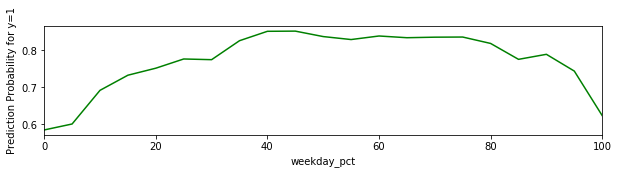

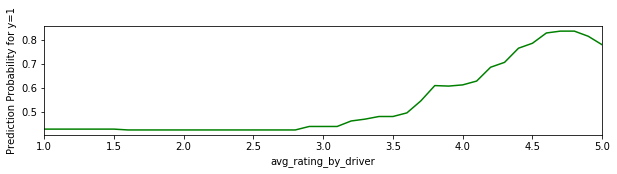

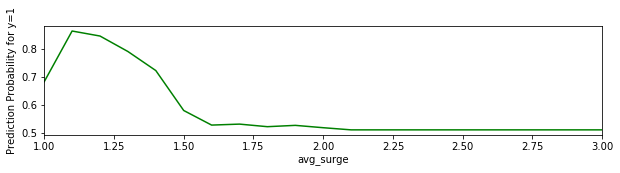

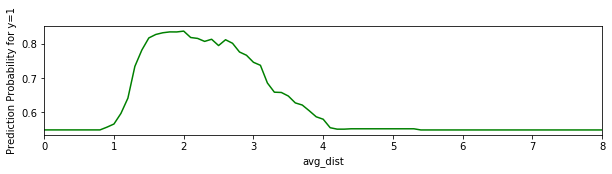

In [1101]:
# Plot the impacts
varImpactPlot('weekday_pct', range(0,105,5));
varImpactPlot('avg_rating_by_driver', np.arange(1,5.1,0.1));
varImpactPlot('avg_surge', np.arange(1,3.1,0.1));

# Note 'avg_dist' is transformed to square root of the original 'avg_dist'
varImpactPlot('avg_dist', np.arange(0,8.1,0.1));

<font size="3">
    
**Insights to improve retention**

- Passengers with mid-level percent of weekday trips tend to have a higher retention propensity. Therefore, targeting those customers (maybe through coupons or passes) would improve the retention.

- The rider’s average rating is a good indication of a probable churn. Further investigations are needed to understand why low rated riders are rated that way and whether it's worth to improve the situation. Moreover, tf this rating is visible to them, low ratings by a handful of abnormal drivers could cause frustration and ultimately churn.

- Huge surge multipliers won't help with the customer retention. While a review of the surge policy could help; however, maybe those customers are happen to commute in busy neighborhoods and are unhappy with late arrivals. Adding more drivers could help in these situations.

- Riders with mid-range distances (between 1 and 10 miles) tend to have a higher retention chance. Targeting more of these customers would help with the overall retention.   

</font>